In [72]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [73]:
np.random.seed(42)

Part (a)
--

First, the maximum likelihood of $\theta=(\mu,\sigma)$ is $(\hat\mu,\hat\sigma)=(\overline X, S)$ where $\overline X$ is the sample mean and $S$ is the sample standard deviation. By equivariance of the MLE, the MLE $\hat\tau$ for $\tau$ is the .95 percentile for $N(\hat\mu,\hat\sigma^2)$. If $Y\sim N(\hat\mu,\hat\sigma^2)$ then $(Y-\hat\mu)/\hat\sigma\sim N(0,1)$ so $$0.95=\mathbb P\left(Y<\hat\tau\right)=\mathbb P\left(\frac{X-\hat\mu}{\hat\sigma} < \frac{\hat\tau-\hat\mu}{\hat\sigma}\right)=\Phi\left(\frac{\hat\tau-\hat\mu}{\hat\sigma}\right).$$ So
$$\hat\tau = \hat\sigma \Phi^{-1}(0.95) + \hat\mu = S\Phi^{-1}(0.95) + \overline X.$$

Part (b)
--

We use the multi-parameter methods described in the chapter. Consider the parameter $\theta=(\mu,\sigma)$. We have
$$\ell_n = \sum \log f(X_i;\mu,\sigma^2) = c - n\log\sigma  - \frac{1}{2}\sum \left(\frac{X_i-\mu}{\sigma}\right)^2$$ where $c$ is a constant. Thus
$$\frac{\partial^2 \ell_n}{\partial \mu^2} = -\frac{n}{\sigma^2}, \ \ \ \frac{\partial^2 \ell_n}{\partial \mu \partial \sigma} = -2\sum \frac{X_i-\mu}{\sigma^3}, \ \ \ \frac{\partial^2 \ell_n}{\partial \sigma^2} = \frac{n}{\sigma^2} - 3 \sum \frac{(X_i-\mu)^2}{\sigma^4}.$$
The expected values of these partial derivatives are
$$-\frac{n}{\sigma^2}, \ \ \ -2\sum \frac{\mathbb E X_i-\mu}{\sigma^3} = 0, \text{ and }
\frac{n}{\sigma^2} - 3 \sum \frac{\mathbb E(X_i-\mu)^2}{\sigma^4} = -\frac{2n}{\sigma^2}.$$
This yields
$$I_n(\theta) = \frac{n}{\sigma^2}\begin{pmatrix} 1 & 0 \\ 0 & 2\end{pmatrix} \text{ and } J_n(\theta) = \frac{\sigma^2}{n} \begin{pmatrix} 1 & 0 \\ 0 & 1/2 \end{pmatrix}.$$
Setting $g(\mu,\theta)=\tau=\sigma z_{0.95} + \mu$ we have
$$\nabla g = \begin{pmatrix} 1 \\ z_{0.95}\end{pmatrix} \text{ and } \nabla g^T J_n \nabla g = \frac{\sigma^2}{n}\left(1+\frac{1}{2}z_{0.95}^2\right).$$

In the case of the maximum likelihood estimator $\hat \tau$ we can estimate $\widehat{\text{se}}(\hat \tau)=\frac{S}{\sqrt{n}}\sqrt{1+z_{0.95}^2/2}$ where $S$ is the sample standard deviation, via Theorem 9.28. Thus, an approximate 95\% confidence interval is
$$\left(\hat \tau - 2\frac{S}{\sqrt{n}}\sqrt{1+z_{0.95}^2/2}, \hat \tau + 2\frac{S}{\sqrt{n}}\sqrt{1+z_{0.95}^2/2}\right)$$ where $\hat \tau$ is as in part (a).

Part (c)
--

To estimate the standard error using the delta method we use our calculations from parts (a) and (b).

In [74]:
X = np.array([3.23, -2.50, 1.88, -0.68, 4.43, 0.17, 1.03, -0.07, -0.01, 0.76,
     1.76, 3.18, 0.33, -0.31, 0.30, -0.61, 1.52, 5.43, 1.54, 2.28,
     0.42, 2.33, -1.03, 4.00, 0.39])

In [75]:
n = len(X)

In [76]:
X_bar = np.mean(X)

In [77]:
S = np.std(X)

In [78]:
z = norm.ppf(0.95, loc=0, scale=1)

In [79]:
tau_hat = S * z + X_bar

In [80]:
se_hat_delta = (S / np.sqrt(n)) * np.sqrt(1+z**2/2)

Now we estimate the standard error using the parametric bootstrap.

In [81]:
B = int(1e5)

In [82]:
T_boot = np.empty(B)

In [83]:
for i in range(B):
    X_star = norm.rvs(loc=X_bar, scale=S, size=n)
    mu_star = np.mean(X_star)
    sigma_star = np.std(X_star)
    tau_star = sigma_star * z + mu_star
    T_boot[i] = tau_star

Text(0.5, 1.0, 'Histogram of parametric bootstrap estimates of $\\tau$')

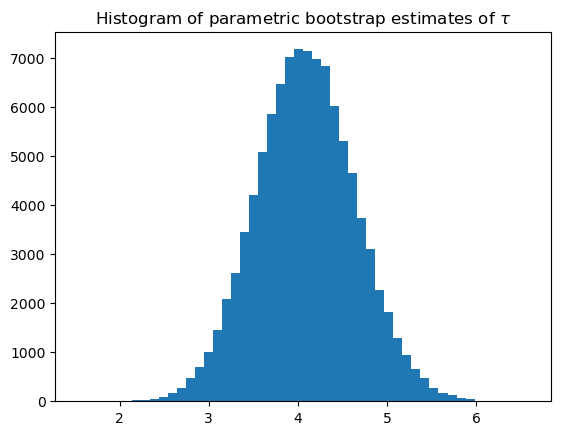

In [84]:
plt.hist(T_boot, bins=50)
plt.title(r'Histogram of parametric bootstrap estimates of $\tau$')

In [85]:
se_hat_bootstrap = np.sqrt(np.mean((T_boot - tau_hat)**2))

In [86]:
print('Sample mean: {:.4f}'.format(X_bar))
print('Sample standard deviation: {:.4f}'.format(S))
print('Estimate for .95 percentile tau: {:.4f}'.format(tau_hat))
print('Estimated standard error from delta method: {:.4f}'.format(se_hat_delta))
print('Estimated standard error from parametric bootstrap: {:.4f}'.format(se_hat_bootstrap))

Sample mean: 1.1908
Sample standard deviation: 1.8176
Estimate for .95 percentile tau: 4.1804
Estimated standard error from delta method: 0.5576
Estimated standard error from parametric bootstrap: 0.5617


The estimates of standard error are quite close between the two methods.